In [1]:
import pandas as pd
df = pd.read_csv('dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')
df 

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


### 1. Tính giá trị tối thiểu, tối đa, trung bình, trung vị, mode và các lượng tứ phân vị:

In [2]:
print(f'{df["M1"].min()}\n{df["M1"].max()}\n')
print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')
print(f'{df["KT"].mode()}\n')
print(f' Giá trị tại phân vị 25% của cột M1: {df["M1"].quantile(0.25)}\n')
# d['M1'].mean(): Trung bình
# df["M1"].median(): Trung vị của cột M1.
# df["KT"].mode(): yếu vị  Giá trị xuất hiện nhiều nhất trong cột KT.  |  ---Q1 (25%)---Q2 (50%)---Q3 (75%)--
# df["M1"].quantile(0.25):         Giá trị tại phân vị 25% của cột M1. |  Q1--> Q3

1.0
7.0

3.74
3.625

0    A
Name: KT, dtype: object

 Giá trị tại phân vị 25% của cột M1: 2.5



In [3]:
df["KT"].value_counts()

KT
A     49
D1    22
C     14
B      9
A1     6
Name: count, dtype: int64

#### 2. Tính khoảng biến thiên và độ lệch:


In [4]:
a= df['M1'].max() - df['M1'].min()
b = df['M1'].quantile(0.75) - df['M1'].quantile(0.25)
# Khoảng Biến Đổi (Range) = max - min    --> Chênh lệch giữa giá trị lớn nhất và nhỏ nhất.
# Khoảng Interquartile (IQR) = Q3 - Q1  --> Chênh lệch giữa phân vị 75% và phân vị 25%.
print(f'Range: {a}')
print(f'Phan vi: {b}')

Range: 6.0
Phan vi: 2.25


#### 3. Độ lệch tuyệt đối trung bình và các giá trị khác:
- std: Độ lệch chuẩn
#
- var : Phương sai 
#
--> Áp dụng định lượng 

In [5]:
# Độ Lệch Trung Bình (Mean Absolute Deviation):
import numpy as np
a  = np.mean(np.abs(df['M1'] - np.mean(df['M1']))) # Độ lệch tuyệt đối trung bình (MAD)
print(f'Do lech trung binh: {a}')

Do lech trung binh: 1.1600000000000001


In [6]:
# Khoảng Biến Đổi của Nhiều Cột:
d = df[['M1','M2']].max() - df[['M1','M2']].min() # Khoảng biến thiên giữa 2 biến M1 và M2
print(d)

M1    6.0
M2    6.5
dtype: float64


#### Var
- Phương sai lớn --> Phân tán lớn, Khác biệt lớn giữa các giá trị. 
- Phương sai nhỏ -->  Giá trị  M1 gần nhau.
#### Std
- Nó cung cấp một con số trực quan hơn về độ phân tán của dữ liệu. Nếu độ lệch chuẩn nhỏ, các giá trị của M1 tập trung quanh giá trị trung bình. Nếu độ lệch chuẩn lớn, các giá trị của M1 phân tán ra xa giá trị trung bình hơn.
#
#
#### Ví dụ minh họa:
- Nếu bạn có cột M1 là điểm thi của sinh viên, phương sai và độ lệch chuẩn sẽ cho bạn biết mức độ dao động của điểm số giữa các sinh viên
- Nếu độ lệch chuẩn lớn, điều đó có nghĩa là điểm số của sinh viên rất khác nhau (có người đạt điểm rất cao, có người đạt điểm rất thấp). Nếu độ lệch chuẩn nhỏ, điều đó có nghĩa là điểm số của sinh viên khá tương đồng với nhau.
#
#
#### Tóm tắt: 
- Mean = 3.7: Trung bình các giá trị của cột M1 là 3.7.
- Phương sai = 2.03: Mức độ phân tán của dữ liệu so với giá trị trung bình ở mức vừa phải.
- Độ lệch chuẩn = 1.42: Các giá trị của M1 chủ yếu tập trung xung quanh giá trị trung bình trong khoảng từ 2.28 đến 5.12.


In [7]:
# Phuong sai
a = df['M1'].var()  # Phương sai (variance) của M1
# Do lech chuan
b = df['M1'].std() # Độ lệch chuẩn (standard deviation) của M1
print(f'Phương sai: {a}')
print(f'Độ lệch chuẩn: {b}')

Phương sai: 2.0289393939393956
Độ lệch chuẩn: 1.4244084364884237


In [8]:
df['M1'].describe()

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: M1, dtype: float64

#### 4. Tính trung bình, độ lệch chuẩn và hệ số biến thiên:

In [9]:
# Thống Kê Mô Tả cho Nhiều Cột:
mean1 = df[['M1','M2']].mean()
std1 = df[['M1','M2']].std()
print('Trung binh:'+ '\n' f'{mean1}'  +'\n')
print('Do lech chuan:'+ '\n' f'{std1}'  +'\n')
#Phương pháp sử dụng std để so sánh
#mức độ biến động của hai hay nhiều biến số
#ví dụ: Hãy so sánh mức độ ổn định của M1 và M2
#Lưu ý: cần đẩm bảo M1, M2 cùng hệ quy chiếu
#độ đo đơn vị so sánh và 
#giá trị trung bình M1 và M2 xấp xỉ nhau

Trung binh:
M1    3.740
M2    4.255
dtype: float64

Do lech chuan:
M1    1.424408
M2    1.060053
dtype: float64



In [10]:
# Hệ Số Biến Đổi (Coefficient of Variation)
# Hệ số biến thiên (CV)  = std / mean 
cv  = df[['M1','M2']].std()/df[['M1','M2']].mean()
print(cv)
#Phương pháp dùng Coficient of variance (CV) để 
# mức độ biến động của hai hay nhiều biến số
#hãy so sánh mức độ biến động của M1 và M2
# Nếu CV Cao: Nếu hệ số biến động (CV) cao, 
# điều này chỉ ra rằng dữ liệu có sự phân tán lớn so với giá trị trung bình, và sự biến động là cao. (NGHƯỢC LẠI)

M1    0.380858
M2    0.249131
dtype: float64


##### Hệ số biến thiên CV
- Nếu CV cao, điều này có nghĩa là dữ liệu phân tán rộng xung quanh giá trị trung bình.
- Nếu CV thấp, điều này chỉ ra rằng dữ liệu phân tán ít hơn, giá trị nằm gần trung bình.

#### 5. Mô tả dữ liệu tổng quát:

In [11]:
df['M1'].describe() # Mô tả chi tiết thống kê cho M1 (count, mean, std, min, Q1, median, Q3, max)
df[['M1','M2','M3']].describe() # Mô tả chi tiết cho M1, M2 và M3


,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


#### 6. Nhóm dữ liệu theo GT và tính các thống kê:

In [12]:
df.groupby('GT')['M1'].describe() # Mô tả thống kê cho GT theo M1


,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [13]:
df.groupby('M1')['GT'].describe() # Mô tả thống kê cho M1 theo GT


,count,unique,top,freq
M1,,,,
1.00,1,1,M,1
1.25,1,1,F,1
1.50,2,1,M,2
1.75,2,2,F,1
2.00,10,2,F,6
2.25,6,2,M,5
2.50,6,2,M,4
2.75,3,1,M,3
3.00,2,2,F,1


In [14]:
# Điểm M2 của giới tính nam ít biến động hơn giới tính nữ
cv = df.groupby('GT')['M2'].std()/df.groupby('GT')['M2'].mean() 
# CV cho M2 theo GT
print(f'CV: {cv}')

CV: GT
F    0.252518
M    0.240146
Name: M2, dtype: float64


In [15]:
df.groupby('GT')[['M1','M2','M3']].describe()
#Đánh giá xem sinh viên nam học môn nào tốt hơn nữ

M1                                                      M2            \
   count      mean       std   min     25%   50%  75%  max count      mean   
GT                                                                           
F   48.0  3.854167  1.348594  1.25  3.1875  3.75  5.0  7.0  48.0  4.046875   
M   52.0  3.634615  1.496288  1.00  2.4375  3.50  4.5  7.0  52.0  4.447115   

    ...               M3                                                      
    ...  75%   max count      mean       std   min     25%    50%  75%   max  
GT  ...                                                                       
F   ...  4.5  6.75  48.0  4.906250  0.946192  3.25  4.2500  4.875  5.5  7.25  
M   ...  5.0  8.00  52.0  4.846154  1.130194  2.75  4.1875  4.625  5.5  8.00  

[2 rows x 24 columns]

In [16]:
df.groupby('GT')[['M1','M2','M3']].std()/df.groupby('GT')[['M1','M2','M3']].mean()
#Môn M2 nam tốt hơn nữ

,M1,M2,M3
GT,,,
F,0.349905,0.252518,0.192854
M,0.411677,0.240146,0.233215


#### 7. Biểu đồ tần số và phân phối:
- kde = True --> use with sns
- bins: độ rộng của cột
- Thường dùng cho biến định lượng

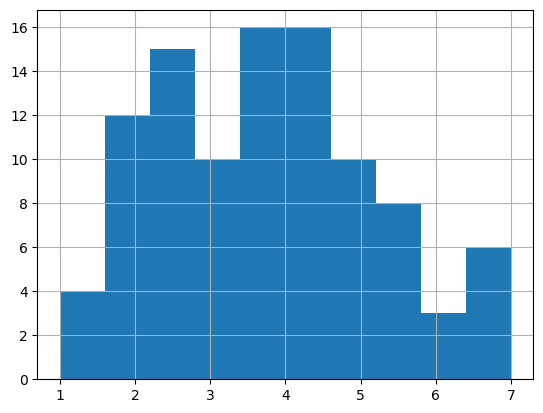

In [17]:
import matplotlib.pyplot as plt
#Mục đích cho biết khoản dữ liệu nào nhiều nhất thấp nhất
# Trục x là điểm trục y là số lần xuất hiện của điểm
df['M1'].hist()
plt.show()

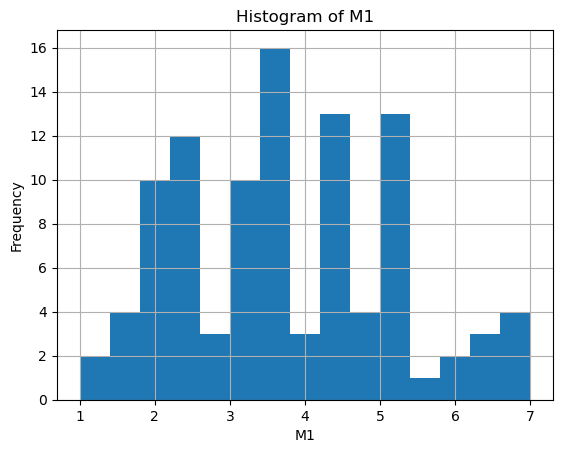

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
df['M1'].hist(bins=15) # Biểu đồ tần số của M1
plt.title('Histogram of M1')
plt.xlabel('M1')
plt.ylabel('Frequency')
plt.show()


<Axes: >

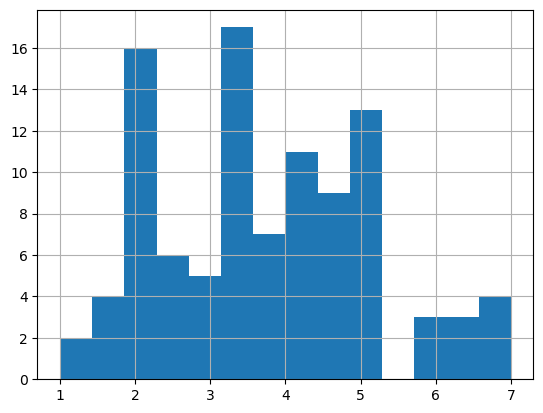

In [19]:
df['M1'].hist(bins=14) # Biểu đồ tần số của M1 với 14 bins


<h3 style="color:yellow"> Biểu đồ displot : định lượng. </h3>

<img src="./1.png"></img>

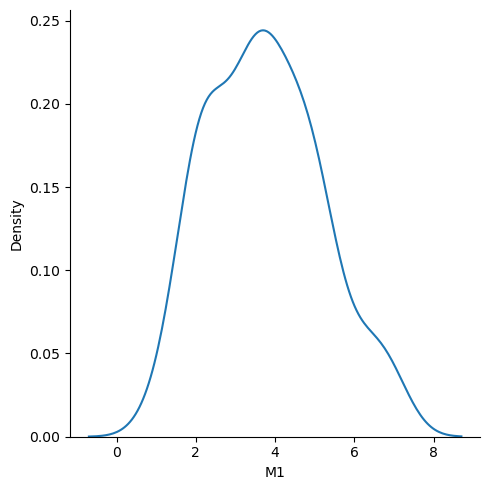

In [20]:
sns.displot(df, x='M1', kind =  'kde') 
# Biểu đồ phân phối mật độ hạt nhân (KDE) của M1
#Nâng cao hơn histogram, ta khám phá dạng phân phối xác xuất
#Làm mịn với phân phối xác xuất
#Nhăc lý thuyết về phân phối xác xuất: phân phối chuẩn
#mật độ xác xuất


- kind='hist': Vẽ biểu đồ histogram.
- kind='kde': Vẽ biểu đồ phân phối mật độ hạt nhân (KDE).

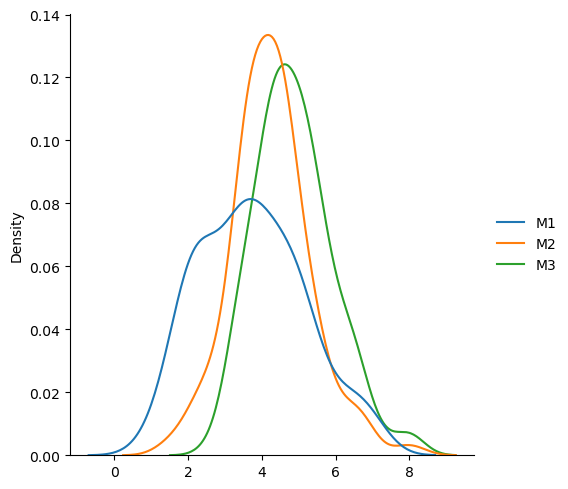

In [21]:
sns.displot(data = df[['M1','M2','M3']], kind='kde') 
# Biểu đồ KDE cho M1, M2, M3
#M2, M3 gần với phân phối chuẩn hơn
# mean , median 

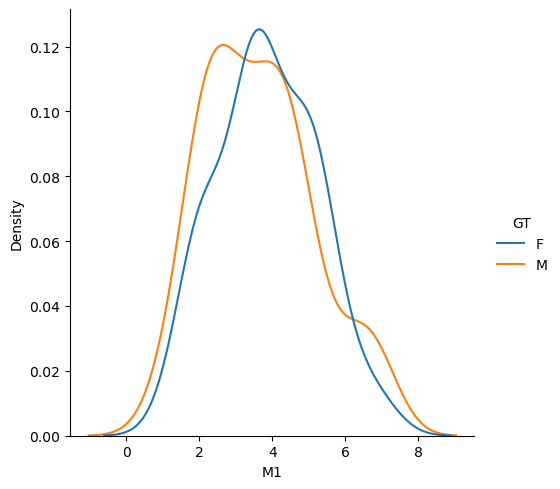

In [22]:
sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()
#Dạng phân phối theo nhóm M1 theo nhóm GT (F hoặc M)

#### 8. Độ lệch và độ nhọn:

###### Tóm tắt:
- Skewness giúp bạn hiểu về độ lệch của phân phối dữ liệu so với giá trị trung bình và có thể ảnh hưởng đến các phân tích thống kê như hồi quy.
- Kurtosis giúp bạn hiểu về sự tập trung và phân phối của dữ liệu quanh giá trị trung bình, điều này có thể cho biết liệu dữ liệu có nhiều điểm cực trị hay không.

In [23]:
''' Skewness
        Skewness = độ xiên, độ lớn (trị tuyệt đối) cho biết mức độ dữ liệu lệch nhiều hay ít so với đường cong phân phối chuẩn.
        Cho biết xác xuất được phân bổ lệch về phía nào nhiều.

        Trị tuyệt đối giá trị càng lớn thì dữ liệu phân phối nghiêng càng nhiều (lệch).

        Diễn giải cho skewness:
        Skewness > 0 tức là mean > median : ta gọi là Positive Skewness hay lệch phải, 
        tức là giá trị ngoại biên outliers nhận giá trị lớn sẽ đẩy giá trị trung bình về cuối

        Skewness < 0 tức là mean < median: ta goi là Negative Skweness hay lệch trái, 
        tức là giá trị outlier nhận giá trị nhỏ sẽ đẩy giá trị trung bình về phía đầu

        Skewness = 0 thì mean = median = mode: Phần phối không lệch còn được gọi là phân phối đối xứng
'''

' Skewness\n        Skewness = độ xiên, độ lớn (trị tuyệt đối) cho biết mức độ dữ liệu lệch nhiều hay ít so với đường cong phân phối chuẩn.\n        Cho biết xác xuất được phân bổ lệch về phía nào nhiều.\n\n        Trị tuyệt đối giá trị càng lớn thì dữ liệu phân phối nghiêng càng nhiều (lệch).\n\n        Diễn giải cho skewness:\n        Skewness > 0 tức là mean > median : ta gọi là Positive Skewness hay lệch phải, \n        tức là giá trị ngoại biên outliers nhận giá trị lớn sẽ đẩy giá trị trung bình về cuối\n\n        Skewness < 0 tức là mean < median: ta goi là Negative Skweness hay lệch trái, \n        tức là giá trị outlier nhận giá trị nhỏ sẽ đẩy giá trị trung bình về phía đầu\n\n        Skewness = 0 thì mean = median = mode: Phần phối không lệch còn được gọi là phân phối đối xứng\n'

In [24]:
'''
Kurtosis (Pearson Kurtosis): Độ nhọn, trị tuyệt đối cho biết mức độ nhọn của phân phối

Giá trị cúa kutorsis:
Càng gần 3 thì fit 
Dưới 3 thì fat
Trên 3 thì thin

Thông thường để đánh giá hình dáng độ nhọn ta dùng đại lượng excess kutorsis (còn gọi là Fisher Kurtosis) = Kurtosis - 3
+ Nếu excess > 0 -> thin
+ Nếu excess = 0 -> fit
+ Nêu excess < 0 -> fat
+ Trị tuyệt đối excess kutoris càng cao thì mức độ thin, fat càng lớn

Lưu ý:
+ Trong pandas sử dụng Fisher's kutorsis
+ Với pp chuẩn thì excess kurtosis = 0, skewness = 0
'''

"\nKurtosis (Pearson Kurtosis): Độ nhọn, trị tuyệt đối cho biết mức độ nhọn của phân phối\n\nGiá trị cúa kutorsis:\nCàng gần 3 thì fit \nDưới 3 thì fat\nTrên 3 thì thin\n\nThông thường để đánh giá hình dáng độ nhọn ta dùng đại lượng excess kutorsis (còn gọi là Fisher Kurtosis) = Kurtosis - 3\n+ Nếu excess > 0 -> thin\n+ Nếu excess = 0 -> fit\n+ Nêu excess < 0 -> fat\n+ Trị tuyệt đối excess kutoris càng cao thì mức độ thin, fat càng lớn\n\nLưu ý:\n+ Trong pandas sử dụng Fisher's kutorsis\n+ Với pp chuẩn thì excess kurtosis = 0, skewness = 0\n"

In [25]:
df['M1'].skew() # Độ lệch của M1 (skewness)
df[['M1','M2','M3']].skew() # Độ lệch của M1, M2, M3
# M1 gần phân phối chuẩn nhất vì gần 0


M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

In [26]:

df[['M1']].kurtosis() # Độ nhọn của M1 (kurtosis)
df[['M1','M2','M3']].kurtosis() # Độ nhọn của M1, M2, M3
# 

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

#### Ví Dụ Cụ Thể:
####Skewness:
#
- Nếu bạn đang phân tích thời gian hoàn thành một bài kiểm tra và thấy rằng hầu hết học sinh hoàn thành bài kiểm tra trong thời gian ngắn với một số ít hoàn thành rất lâu, thì bạn có thể thấy độ lệch phải trong phân phối thời gian hoàn thành bài kiểm tra.
#
#### Kurtosis:
#
- Nếu bạn đang phân tích điểm số thi của sinh viên và thấy rằng hầu hết các điểm số tập trung quanh điểm trung bình với một số ít điểm số rất cao hoặc rất thấp, bạn có thể thấy độ nhọn cao (leptokurtic) trong phân phối điểm số.

#### 1. Độ Lệch (Skewness):
> Định Nghĩa: Độ lệch đo lường sự bất đối xứng của phân phối dữ liệu quanh giá trị trung bình.
#
#### Ý Nghĩa:
- Skewness = 0: Phân phối dữ liệu có thể được coi là đối xứng (phân phối chuẩn).
- Skewness > 0: Phân phối lệch phải (dài về phía bên phải).
- Skewness < 0: Phân phối lệch trái (dài về phía bên trái).

<h2 style="color:yellow">Biểu đồ hộp (boxplot):</h2>

-  orient="h": nằm nang
-  orient="v": nằm thẳng --> mặc định 
- Tứ phân vị: 
-  -----Q1(25%)--------Q2(50%)--------Q3(75%)--------
##### Note: Sao cao nhất và thấp nhât có giá trị ngoại lai: 
#
- IQR = Q3 - Q1 
#
#### Cao nhat và thấp nhất:
- Q3 + 1.5 x IQR
- Q1 - 1.5 x IQR
  


In [27]:
'''
Đây là biểu đồ quan trọng trong việc phân tích dữ liệu định lượng
Biểu đồ nay cung cấp các thông tin quan trọng như:
1. Q1: Tứ phân vị 25%
2. Q2: Tứ phân vị 50% (median)
3. Q3: Tứ phân vị 75%
4. Độ lớn IQR = |Q3-Q1|
5.Lower bound = Q1 - 1.5 * IQR (cận dưới khác với giá trị nhỏ nhất)
6.Upper bound = Q3 + 1.5 * IQR (cận trên khác với giá trị lớn nhất)
7. Các ngoại biên, bất thường (outlier) cần xử lý trong dữ liệu
Outlier: Là điểm dữ liệu khác biệt quá nhiều so với đa số

Hướng dẫn
+ Tính khoảng nghi ngờ chứa outliers
+ Tính khoảng chắc chắn chứa outliers
'''

'\nĐây là biểu đồ quan trọng trong việc phân tích dữ liệu định lượng\nBiểu đồ nay cung cấp các thông tin quan trọng như:\n1. Q1: Tứ phân vị 25%\n2. Q2: Tứ phân vị 50% (median)\n3. Q3: Tứ phân vị 75%\n4. Độ lớn IQR = |Q3-Q1|\n5.Lower bound = Q1 - 1.5 * IQR (cận dưới khác với giá trị nhỏ nhất)\n6.Upper bound = Q3 + 1.5 * IQR (cận trên khác với giá trị lớn nhất)\n7. Các ngoại biên, bất thường (outlier) cần xử lý trong dữ liệu\nOutlier: Là điểm dữ liệu khác biệt quá nhiều so với đa số\n\nHướng dẫn\n+ Tính khoảng nghi ngờ chứa outliers\n+ Tính khoảng chắc chắn chứa outliers\n'

<Axes: xlabel='M1'>

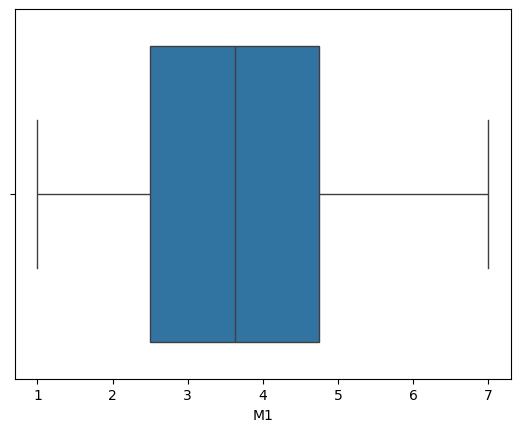

In [28]:
sns.boxplot(data=df['M1'], orient="h") # Boxplot cho M1
# 

In [29]:
# Trung vi: 50% người nhỏ hơn điểm 3.8 và 50% người lớn hơn 3.8 
# Bất trung vị(75%) Q3: có hơn 75% số người nhỏ hơn ngoặc bằng 4.8 
# Bất trung vị(25%) Q1: có hơn 25% số người nhỏ hơn ngoặc bằng 2.6
 


<Axes: >

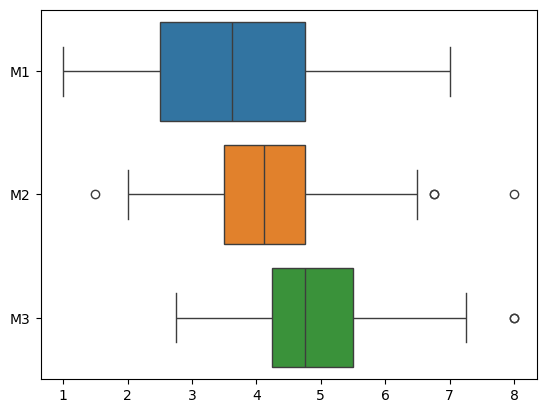

In [30]:
sns.boxplot(data=df[['M1','M2','M3']], orient='h') # Boxplot cho M1, M2, M3



> #M1 là điểm k có giá trị bất thường

<Axes: xlabel='M1', ylabel='KT'>

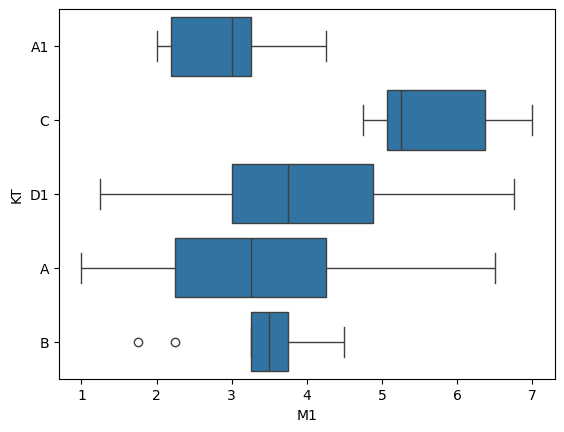

In [31]:
# Câu hỏi: khối thi nào có lower bound trùng với tứ phân vị thứ 1 (tức là Q1)
# Answer: khoi B
sns.boxplot(x='M1', y='KT',data=df, orient='h') # Boxplot M1 theo KT

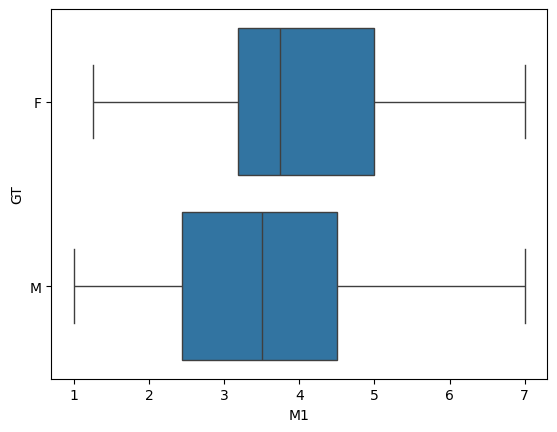

In [32]:
sns.boxplot(x='M1', y='GT',data=df, orient='h')
plt.show()
# M1 trên giới tính nào có bất thường
# Không có
# Yếu tố giới tính có đóng góp trong việc dự báo điểm M1 hay không
#Trả lời: Có

<Axes: xlabel='KT', ylabel='M1'>

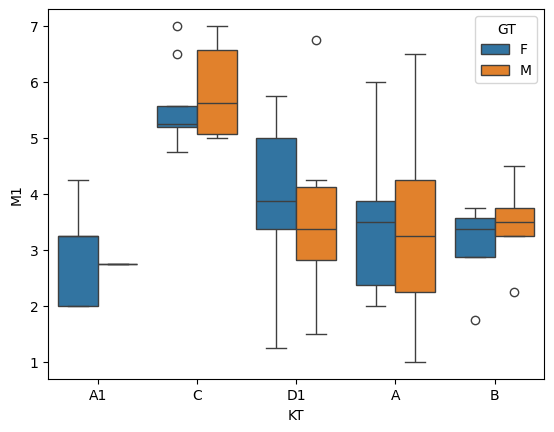

In [33]:
sns.boxplot(x='KT', y='M1',hue='GT',data=df) # Boxplot M1 theo GT và KT
# Xác định các biểu đồ bất thường
# C D1 B
#C:F D1:M B:M B:F


<Axes: xlabel='KT', ylabel='M1'>

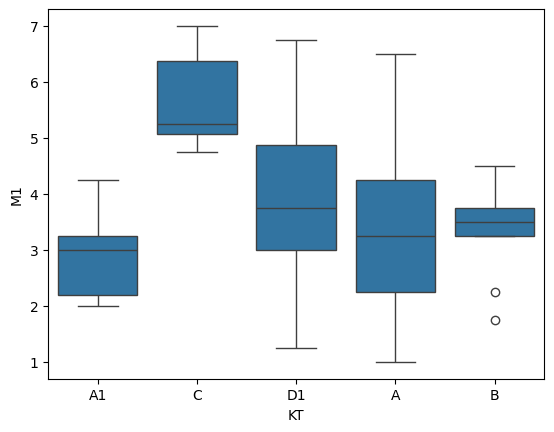

In [34]:
sns.boxplot(x='KT', y='M1',data=df) # Boxplot M1 theo GT và KT



<h2 style="color:yellow">Biểu đồ Q-Q plot (Quantile-Quantile plot):</h2>
Dùng cho biến định lượng.

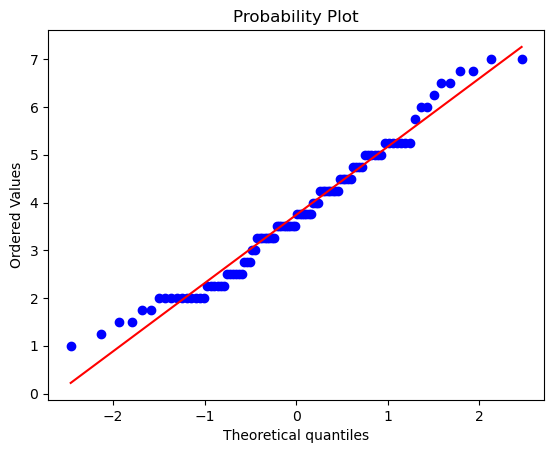

In [35]:
from scipy import stats
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()


<h3 style="color: yellow"> Phân Tích Sự Tương Quan Giữa Hai Biến Định Lượng</h3>


#### Hiệp phương sai: co-variance: hai biến định lượng

In [36]:
# Phân tích sự tương quan (tác động, ảnh hưởng ) qua lại giữa 2 biến định lượng
'''
Phương pháp 1: Hiệp phương sai: co-variance
Giá trị > 0 thì 2 biến có tương quan thuận (đồng biến)
Giá trị < 0  thì 2 biến có tương quan nghịch (nghịch biến)
Giá trị = 0 thì 2 biến không tương quan
Độ lớn (trị tuyẹt đối của giá trị ) càng lớn thì mức độ quan hệ (tương quan) 
càng chặt chẽ
'''
df[['M1','M2']].cov()
# M1 và M2 = 0.05 > 0 có tương quan thuận với nhau

,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


In [37]:
df[['M1','M2','M3']].cov()
# M2 với M3 = -0.1 < 0 tương quan nghịch với nhau

,M1,M2,M3
M1,2.028939,0.053081,0.027778
M2,0.053081,1.123712,-0.101010
M3,0.027778,-0.101010,1.083965


#### Phương pháp so sánh tương quan băng co-variance

In [38]:
'''
Với phương pháp so sánh tương quan băng co-variance thì ta không đo lường được cường độ tương quan giữa 2 biến định lượng.
Pearson Correlation: Tương quan tuyến tính
r năm trong khoảng [-1,1]
r = 0 => không tương quan
r < 0: Tương quan nghịch
r > 0: Tuong quan thuan
|r| càng gần 1 thì tương quan càng cao
|r| < 0.5: thì mức độ tương quan thấp
    [0.5,0.65]: khá
    [0.65,0.75]: tốt
    [0.75,0.9]: rất tốt
    > 0.9: hoàn hảo

Ma trận tương quan: correlation matrix

* Lưu ý: được sử dụng khảo sát tương quan tuyến tính nhằm phân tích mối quan hệ tuyến tính giữa 2 biến định lượng
'''
df[['M1','M2']].corr()
# M1 và M2 = 0.03 < 0.5: tương quan thấp

,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


<h3 style="color:yellow">Biểu Đồ Hồi Quy Tuyến Tính (Linear Regression Plot)<h3>
DDinhj luong

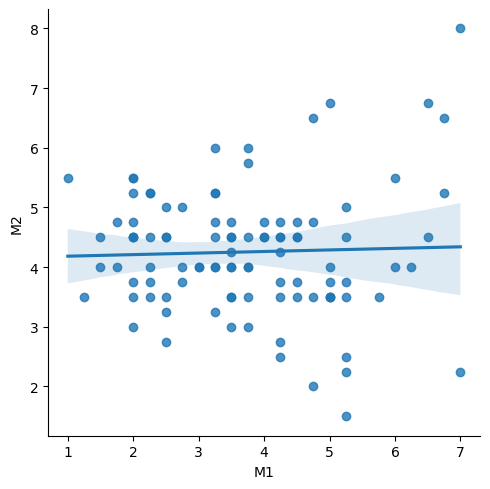

In [39]:
'''
Trực quan hóa tương quan tuyến tính giữa 2 biến định lượng 
Khám phá tương quan tuyến tính của 2 biến định lương
thông qua biểu đồ phân tán (Scatter)
M2=A*M1 + B
'''
sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()

# Phân tán không đồng đều không theo xu hướng hồi quy
# Đường hồi quy có độ dốc dương, điều đó cho thấy 'M2' có xu hướng tăngtăng khi 'M1' tăng


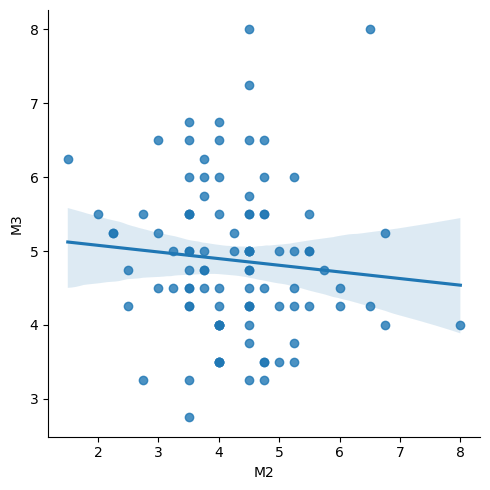

In [40]:
#Vẽ biểu đồ khám phá tương quan giữa M2 và M3
sns.lmplot(data=df, x='M2', y='M3', fit_reg=True)
plt.show()


In [41]:
#Hãy sắp xếp mức độ tác động của M1 đến các điểm M2, M3

df[['M1','M2','M3']].corr()



,M1,M2,M3
M1,1.000000,0.035154,0.018731
M2,0.035154,1.000000,-0.091523
M3,0.018731,-0.091523,1.000000


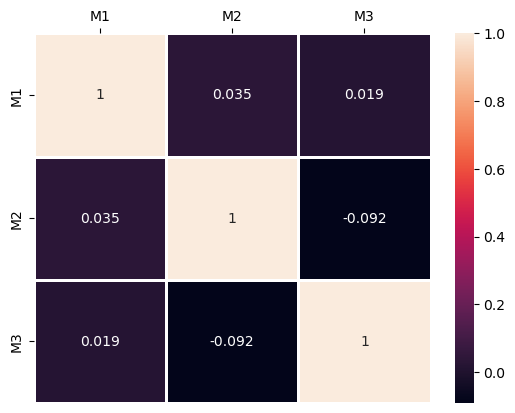

In [42]:
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False, annot=True, linewidths=1).xaxis.tick_top()
# màu càng nhạt thì tương quan càng cao


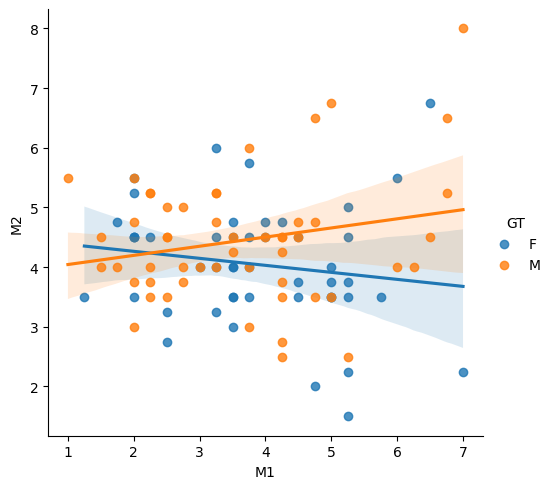

In [43]:
'''
Trực quan tương quan tuyến tính theo nhóm (định tính) giữa 2 biến định lượng
'''
sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()

# M2 sẽ tỉ lệ thuận với M1 theo giới tính Nam
# M2 sẽ tỉ lệ nghịch với M1 theo giới tính Nữ

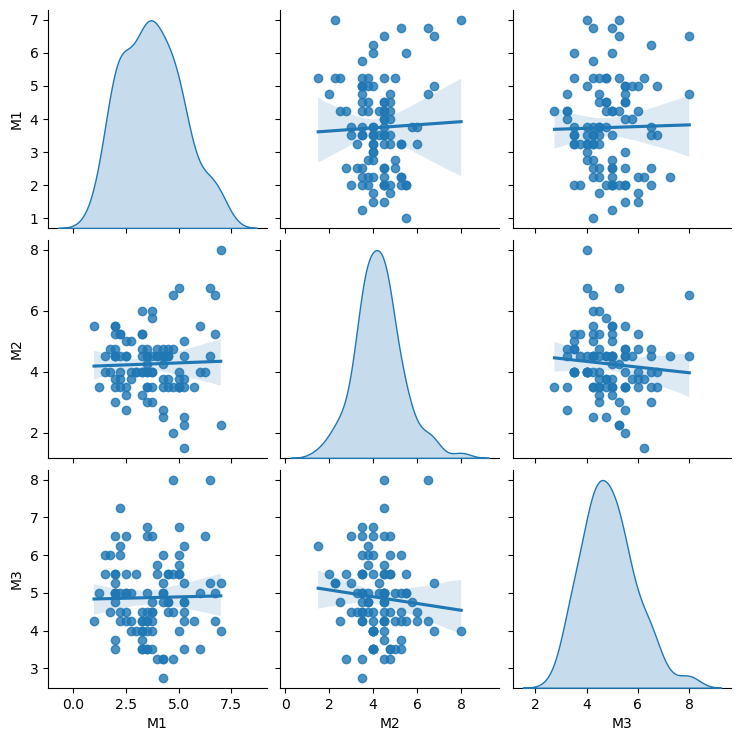

In [44]:
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
# diag_kind='kde': Tham số này xác định cách vẽ các biểu đồ trên đường chéo (diagonal plots). Ở đây, kde (Kernel Density Estimate) được sử dụng để tạo biểu đồ phân phối mật độ cho mỗi biến. Điều này cho phép bạn thấy phân phối của từng biến
# kind='reg': Tham số này chỉ định loại biểu đồ cho các ô không phải chéo (non-diagonal plots). Khi kind='reg', một đường hồi quy tuyến tính sẽ được vẽ trên biểu đồ phân tán (scatter plot) giữa các cặp biến. Điều này giúp bạn thấy mối quan hệ giữa các biến định lượng và xem có sự tương quan giữa chúng hay không.
plt.show()

#### 10. Phân tích tương quan:

In [45]:
df[['M1','M2']].cov() # Ma trận hiệp phương sai (covariance) giữa M1 và M2



,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


In [46]:
df[['M1','M2']].corr() # Ma trận tương quan (correlation) giữa M1 và M2


,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


- df[['M1', 'M2', 'M3']].corr(): Tính ma trận tương quan giữa các biến M1, M2, và M3.
- vmax=1.0: Đặt giá trị tối đa cho màu sắc của heatmap.
- square=False: Đặt kích thước của heatmap không bị cố định thành hình vuông.

<Axes: >

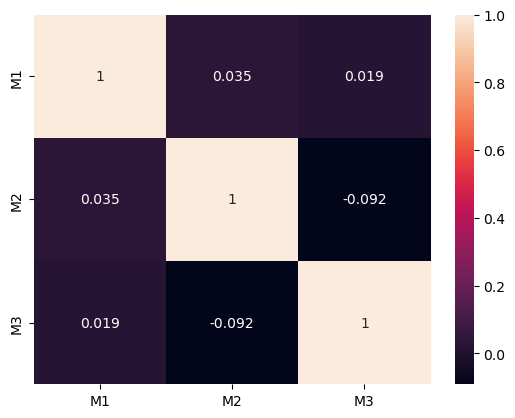

In [47]:
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False, annot =True) # Heatmap tương quan giữa M1, M2, M3

<Axes: >

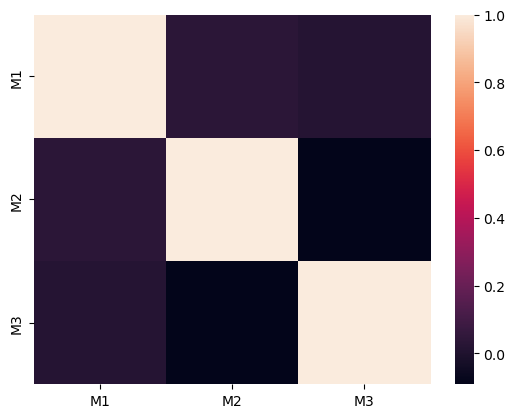

In [48]:
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False) # Heatmap tương quan giữa M1, M2, M3

#### 11. Phân tích hồi quy tuyến tính:

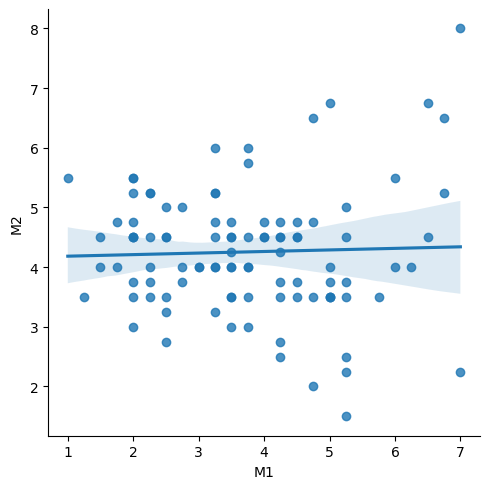

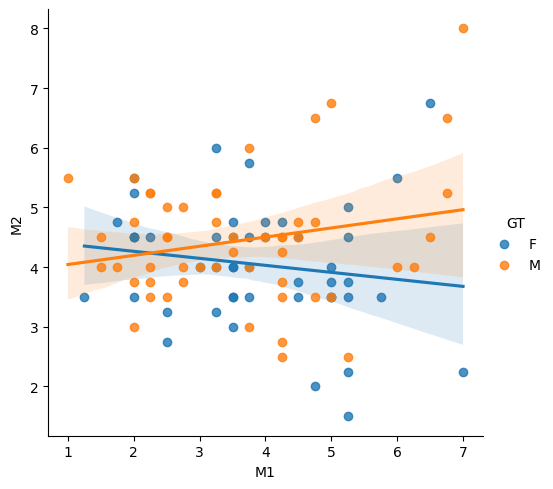

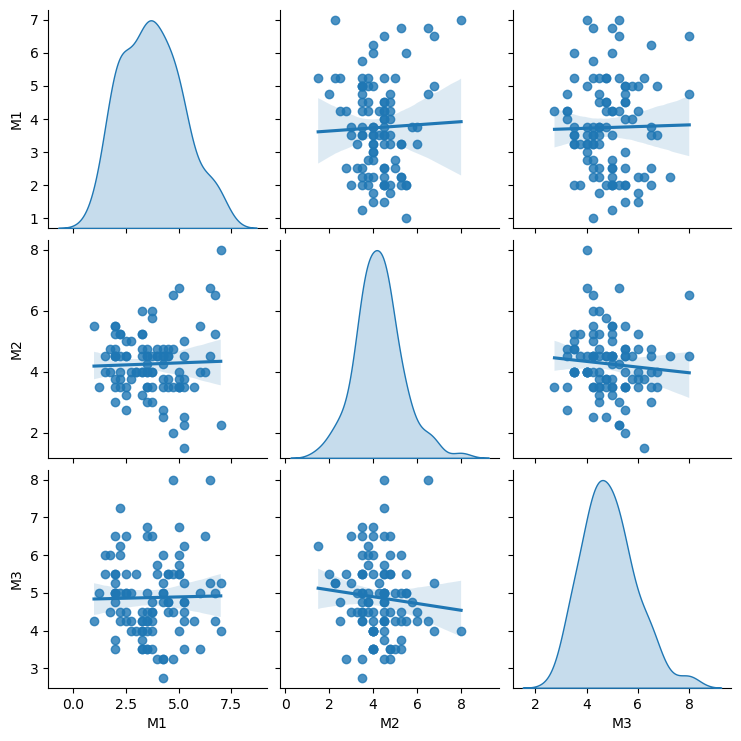

In [49]:
sns.lmplot(data=df, x='M1', y='M2', fit_reg=True) # Biểu đồ hồi quy tuyến tính giữa M1 và M2
sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True) # Hồi quy tuyến tính có phân biệt GT
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg') # Pairplot với hồi quy giữa M1, M2, M3
